In [4]:
from selenium import webdriver
import urllib.request
from bs4 import BeautifulSoup

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

In [5]:
import pandas as pd
import time

ts_ms = pd.date_range(start = '2020-09-01', end = None, periods = 98, freq = 'D')
ts_list = list(map(str, list(ts_ms)))

def str_slicing(x):
    x = x[:10]
    return x

date_list = list(map(str_slicing, ts_list))
print(date_list)

['2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04', '2020-09-05', '2020-09-06', '2020-09-07', '2020-09-08', '2020-09-09', '2020-09-10', '2020-09-11', '2020-09-12', '2020-09-13', '2020-09-14', '2020-09-15', '2020-09-16', '2020-09-17', '2020-09-18', '2020-09-19', '2020-09-20', '2020-09-21', '2020-09-22', '2020-09-23', '2020-09-24', '2020-09-25', '2020-09-26', '2020-09-27', '2020-09-28', '2020-09-29', '2020-09-30', '2020-10-01', '2020-10-02', '2020-10-03', '2020-10-04', '2020-10-05', '2020-10-06', '2020-10-07', '2020-10-08', '2020-10-09', '2020-10-10', '2020-10-11', '2020-10-12', '2020-10-13', '2020-10-14', '2020-10-15', '2020-10-16', '2020-10-17', '2020-10-18', '2020-10-19', '2020-10-20', '2020-10-21', '2020-10-22', '2020-10-23', '2020-10-24', '2020-10-25', '2020-10-26', '2020-10-27', '2020-10-28', '2020-10-29', '2020-10-30', '2020-10-31', '2020-11-01', '2020-11-02', '2020-11-03', '2020-11-04', '2020-11-05', '2020-11-06', '2020-11-07', '2020-11-08', '2020-11-09', '2020-11-10', '2020

In [ ]:
driver = webdriver.Chrome('/home/lab01/chromedriver', options=chrome_options)
driver.implicitly_wait(3)
driver.get("https://www.safetyreport.go.kr/#introduction/safeSingoStatistics")

i = 0
num_list = []
for date in date_list:
    if i == 0:
        i += 1
        target = driver.find_element_by_css_selector('#seachDateType')
        target.click()
        category = driver.find_element_by_css_selector('#seachDateType > option:nth-child(2)')
        category.click()
        time.sleep(2)
    
    start_date_element = driver.find_element_by_css_selector('#C_FRM_DATE')
    start_date_element.clear()
    start_date_element.send_keys(date)
    time.sleep(1)
    end_date_element = driver.find_element_by_css_selector('#C_TO_DATE')
    end_date_element.clear()
    end_date_element.send_keys(date)
    time.sleep(1)
    search_element = driver.find_element_by_css_selector('#form > fieldset > div > button')
    search_element.click()
    time.sleep(1)

    num = driver.find_element_by_css_selector('#grid > tbody > tr:nth-child(23) > td:nth-child(2) > a')
    print(date, ':', num.text)
    num_list.append(num.text)
    time.sleep(2)

In [7]:
num_list = list(map(int, list(num_list)))
print(len(num_list))
print(num_list)

98
[0, 0, 32, 143, 118, 82, 64, 117, 122, 125, 139, 143, 126, 117, 116, 148, 112, 114, 96, 93, 98, 93, 79, 91, 75, 95, 85, 103, 157, 102, 61, 110, 119, 97, 87, 71, 119, 102, 108, 76, 87, 84, 91, 139, 127, 117, 110, 104, 101, 104, 82, 95, 85, 60, 73, 83, 89, 91, 84, 86, 95, 75, 67, 78, 76, 65, 91, 110, 68, 138, 104, 113, 158, 326, 312, 277, 325, 297, 338, 289, 324, 251, 205, 281, 318, 369, 403, 324, 276, 227, 276, 293, 308, 254, 282, 239, 221, 284]


In [8]:
without_mask = pd.DataFrame(index = date_list, data = num_list)
without_mask.columns = ['마스크 미착용 신고건수']
display(without_mask)

,마스크 미착용 신고건수
2020-09-01,0
2020-09-02,0
2020-09-03,32
2020-09-04,143
2020-09-05,118
...,...
2020-12-03,254
2020-12-04,282
2020-12-05,239
2020-12-06,221


In [17]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "../malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

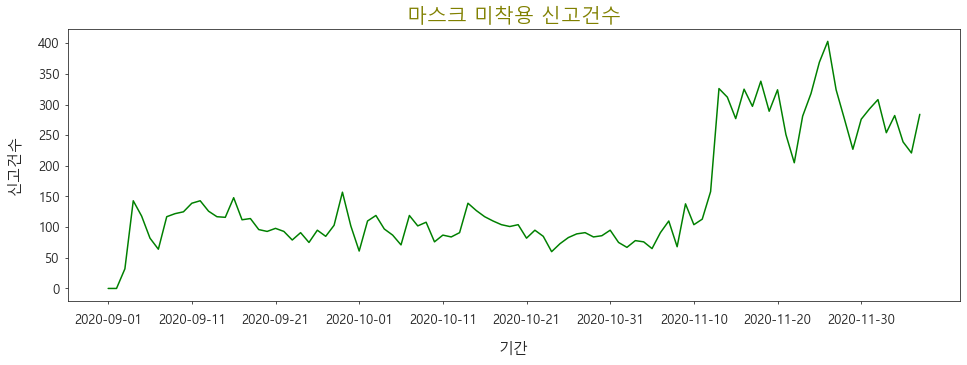

In [85]:
from matplotlib import rcParams

plt.figure(figsize=(16,5))
plt.plot(without_mask.index, without_mask.values, color='green')
# plt.plot(without_mask.index, without_mask.values, marker='o', markersize=5, color='green', markerfacecolor='yellow')

plt.title('마스크 미착용 신고건수', size=20, color='olive')
plt.xticks(without_mask.index, size=13)
plt.yticks(size=13)
plt.xlabel('기간', size=15, labelpad=15)
plt.ylabel('신고건수', size=15, labelpad=15)
plt.locator_params(axis='x', nbins=10)
plt.tick_params(axis='x', direction='out', length=3, pad=10, bottom=True)
plt.tick_params(axis='y', direction='out', length=3, pad=5, left=True)
# plt.xlim(without_mask.index[0], without_mask.index[-1])

plt.show()